### My Experimentations on SG Job Data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in the cvs file
data = pd.read_csv("../data/SGJobData_1000.csv")
df = pd.DataFrame(data)

In [3]:
#columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   categories                          1000 non-null   object 
 1   employmentTypes                     1000 non-null   object 
 2   metadata_expiryDate                 1000 non-null   object 
 3   metadata_isPostedOnBehalf           1000 non-null   bool   
 4   metadata_jobPostId                  1000 non-null   object 
 5   metadata_newPostingDate             1000 non-null   object 
 6   metadata_originalPostingDate        1000 non-null   object 
 7   metadata_repostCount                1000 non-null   int64  
 8   metadata_totalNumberJobApplication  1000 non-null   int64  
 9   metadata_totalNumberOfView          1000 non-null   int64  
 10  minimumYearsExperience              1000 non-null   int64  
 11  numberOfVacancies                   1000 non

In [4]:
#shape of the dataframe
df.shape

(1000, 21)

In [5]:
df.head()

,categories,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,...,numberOfVacancies,occupationId,positionLevels,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title
0,"[{""id"":13,""category"":""Environment / Health""},{...",Permanent,8/5/2023,False,MCF-2023-0252866,8/4/2023,30/3/2023,2,5,151,...,1,NaN,Executive,WORKSTONE PTE. LTD.,2800,2000,Monthly,0,Closed,Food Technologist - Clementi | Entry Level | U...
1,"[{""id"":21,""category"":""Information Technology""}]",Permanent,8/5/2023,False,MCF-2023-0273977,8/4/2023,8/4/2023,0,0,55,...,2,NaN,Executive,TRUST RECRUIT PTE. LTD.,5500,4000,Monthly,0,Closed,"Software Engineer (Fab Support) (Java, CIM, Up..."
2,"[{""id"":33,""category"":""Repair and Maintenance""}]",Full Time,22/4/2023,False,MCF-2023-0273994,8/4/2023,8/4/2023,0,7,99,...,1,NaN,Senior Executive,PU TIEN SERVICES PTE. LTD.,4600,3800,Monthly,0,Closed,Senior Technician
3,"[{""id"":21,""category"":""Information Technology""}]",Permanent,8/5/2023,False,MCF-2023-0273991,8/4/2023,8/4/2023,0,6,113,...,1,NaN,Senior Executive,TRUST RECRUIT PTE. LTD.,10000,5000,Monthly,0,Closed,"Senior .NET Developer (.NET Core, MVC, MVVC, S..."
4,"[{""id"":2,""category"":""Admin / Secretarial""}]",Full Time,8/5/2023,False,MCF-2023-0273976,8/4/2023,8/4/2023,0,3,99,...,3,NaN,Non-executive,EATZ CATERING SERVICES PTE. LTD.,3400,2400,Monthly,0,Closed,Sales / Admin Cordinator


In [6]:
df["positionLevels"].value_counts()

Executive            226
Junior Executive     149
Professional         133
Senior Executive     121
Non-executive        117
Fresh/entry level    106
Manager               96
Middle Management     30
Senior Management     22
Name: positionLevels, dtype: int64

In [7]:
df["title"].value_counts()

Project Engineer                                                               6
Chef                                                                           5
Senior Network Specialist                                                      5
Senior Software Engineer                                                       5
Business Development Manager                                                   4
                                                                              ..
Logistics Executive - Retail Industry /Central  (1 year renewable contract)    1
Assistant Service Manager@Japanese Restaurant                                  1
Maintenance Engineer (PLC) MNC                                                 1
Buyer (No Experience Needed) Manufacturing MNC                                 1
Senior Sales Executive (IT/Printing Solutions)                                 1
Name: title, Length: 920, dtype: int64

In [8]:
df["salary_maximum"].describe()

count     1000.000000
mean      5141.234000
std       2962.224195
min          1.000000
25%       3200.000000
50%       4500.000000
75%       6000.000000
max      22000.000000
Name: salary_maximum, dtype: float64

In [9]:
df["salary_maximum"]

0       2800
1       5500
2       4600
3      10000
4       3400
       ...  
995     9000
996     3500
997     4500
998     3000
999     5500
Name: salary_maximum, Length: 1000, dtype: int64

### Job Title Analysis
Let's analyze the job titles in our dataset to understand:
1. Most common job titles
2. Common patterns in job titles
3. Job levels/seniority distribution

In [10]:
# Basic title analysis
job_titles = df['title'].value_counts()

print("Top 10 Most Common Job Titles:")
print(job_titles.head(10))

# Count total unique titles
print(f"\nTotal unique job titles: {len(job_titles)}")

Top 10 Most Common Job Titles:
Project Engineer                6
Chef                            5
Senior Network Specialist       5
Senior Software Engineer        5
Business Development Manager    4
Assistant Manager               4
Admin Executive                 4
Technical Lead                  4
Sales Executive                 3
Site Engineer                   3
Name: title, dtype: int64

Total unique job titles: 920


In [11]:
df

,categories,employmentTypes,metadata_expiryDate,metadata_isPostedOnBehalf,metadata_jobPostId,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,...,numberOfVacancies,occupationId,positionLevels,postedCompany_name,salary_maximum,salary_minimum,salary_type,status_id,status_jobStatus,title
0,"[{""id"":13,""category"":""Environment / Health""},{...",Permanent,8/5/2023,False,MCF-2023-0252866,8/4/2023,30/3/2023,2,5,151,...,1,NaN,Executive,WORKSTONE PTE. LTD.,2800,2000,Monthly,0,Closed,Food Technologist - Clementi | Entry Level | U...
1,"[{""id"":21,""category"":""Information Technology""}]",Permanent,8/5/2023,False,MCF-2023-0273977,8/4/2023,8/4/2023,0,0,55,...,2,NaN,Executive,TRUST RECRUIT PTE. LTD.,5500,4000,Monthly,0,Closed,"Software Engineer (Fab Support) (Java, CIM, Up..."
2,"[{""id"":33,""category"":""Repair and Maintenance""}]",Full Time,22/4/2023,False,MCF-2023-0273994,8/4/2023,8/4/2023,0,7,99,...,1,NaN,Senior Executive,PU TIEN SERVICES PTE. LTD.,4600,3800,Monthly,0,Closed,Senior Technician
3,"[{""id"":21,""category"":""Information Technology""}]",Permanent,8/5/2023,False,MCF-2023-0273991,8/4/2023,8/4/2023,0,6,113,...,1,NaN,Senior Executive,TRUST RECRUIT PTE. LTD.,10000,5000,Monthly,0,Closed,"Senior .NET Developer (.NET Core, MVC, MVVC, S..."
4,"[{""id"":2,""category"":""Admin / Secretarial""}]",Full Time,8/5/2023,False,MCF-2023-0273976,8/4/2023,8/4/2023,0,3,99,...,3,NaN,Non-executive,EATZ CATERING SERVICES PTE. LTD.,3400,2400,Monthly,0,Closed,Sales / Admin Cordinator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"[{""id"":11,""category"":""Engineering""},{""id"":33,""...",Full Time,7/5/2023,False,MCF-2023-0273808,7/4/2023,7/4/2023,0,15,212,...,1,NaN,Executive,DIESELMAN MARINE SERVICE SINGAPORE PTE. LTD.,9000,6000,Monthly,0,Closed,Service Technician
996,"[{""id"":15,""category"":""F&B""},{""id"":19,""category...",Full Time,12/7/2023,False,MCF-2023-0273812,12/6/2023,7/4/2023,2,0,55,...,20,NaN,Executive,FRESH BAY (S) INVESTMENTS PTE. LTD.,3500,3000,Monthly,0,Re-open,"Senior Supervisor | Up to $3,500"
997,"[{""id"":1,""category"":""Accounting / Auditing / T...",Part Time,7/6/2023,False,MCF-2023-0273790,8/5/2023,7/4/2023,1,41,895,...,2,NaN,Senior Executive,AVANZ ASIA PTE. LTD.,4500,2600,Monthly,0,Closed,Senior Account Executive
998,"[{""id"":24,""category"":""Logistics / Supply Chain""}]",Full Time,7/5/2023,False,MCF-2023-0273792,7/4/2023,7/4/2023,0,11,104,...,2,NaN,Junior Executive,TRUST RECRUIT PTE. LTD.,3000,2500,Monthly,0,Closed,Logistic Officer - Shipping - Freight Forward


In [12]:
# Function to extract common patterns/keywords from job titles
def extract_common_keywords(titles):
    # Convert all titles to lowercase for better matching
    titles = titles.str.lower()
    
    # Common job levels/seniority
    levels = ['senior', 'sr', 'lead', 'principal', 'junior', 'jr', 'manager', 'director', 'head', 'chief']
    
    # Count occurrences of each level
    level_counts = {}
    for level in levels:
        level_counts[level] = titles.str.contains(r'\b' + level + r'\b').sum()
    
    return pd.Series(level_counts)

# Analyze seniority levels
seniority_analysis = extract_common_keywords(df['title'])
print("\nSeniority Level Distribution:")
print(seniority_analysis.sort_values(ascending=False))


Seniority Level Distribution:
manager      135
senior       104
junior        10
lead           9
director       8
principal      6
head           4
sr             0
jr             0
chief          0
dtype: int64


In [13]:
# Extract common words from job titles (excluding common stop words)
from collections import Counter
import re

def get_common_words(titles):
    # Drop null values
    titles = titles.dropna()
    # Convert to lowercase and split into words
    words = ' '.join(titles.str.lower()).split()
    
    # Remove common stop words and short words
    stop_words = {'the', 'and', 'for', 'in', 'to', 'of', 'a', 'at', '&', '-'}
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    return Counter(words).most_common(20)

print("\nMost Common Words in Job Titles:")
common_words = get_common_words(df['title'])
for word, count in common_words:
    print(f"{word}: {count}")


Most Common Words in Job Titles:
engineer: 133
executive: 128
manager: 121
senior: 102
assistant: 100
sales: 78
mnc: 75
admin: 50
service: 47
project: 43
officer: 42
operations: 33
supervisor: 31
year: 28
global: 27
aws: 27
contract: 27
accounts: 26
days: 26
business: 25


### Salary Analysis and Visualization
Let's create visualizations to understand:
1. Overall salary distribution
2. Salary ranges by position levels
3. Top paying job titles

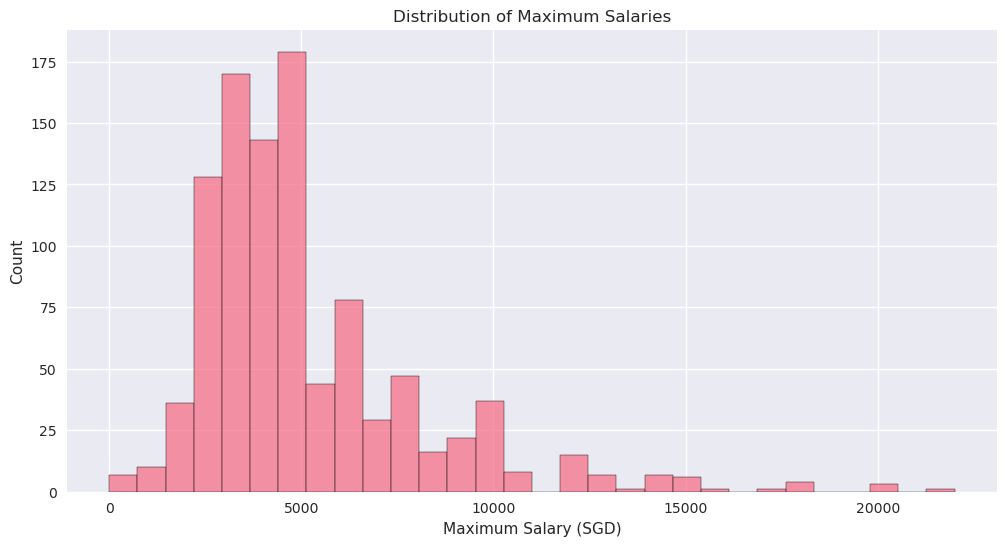

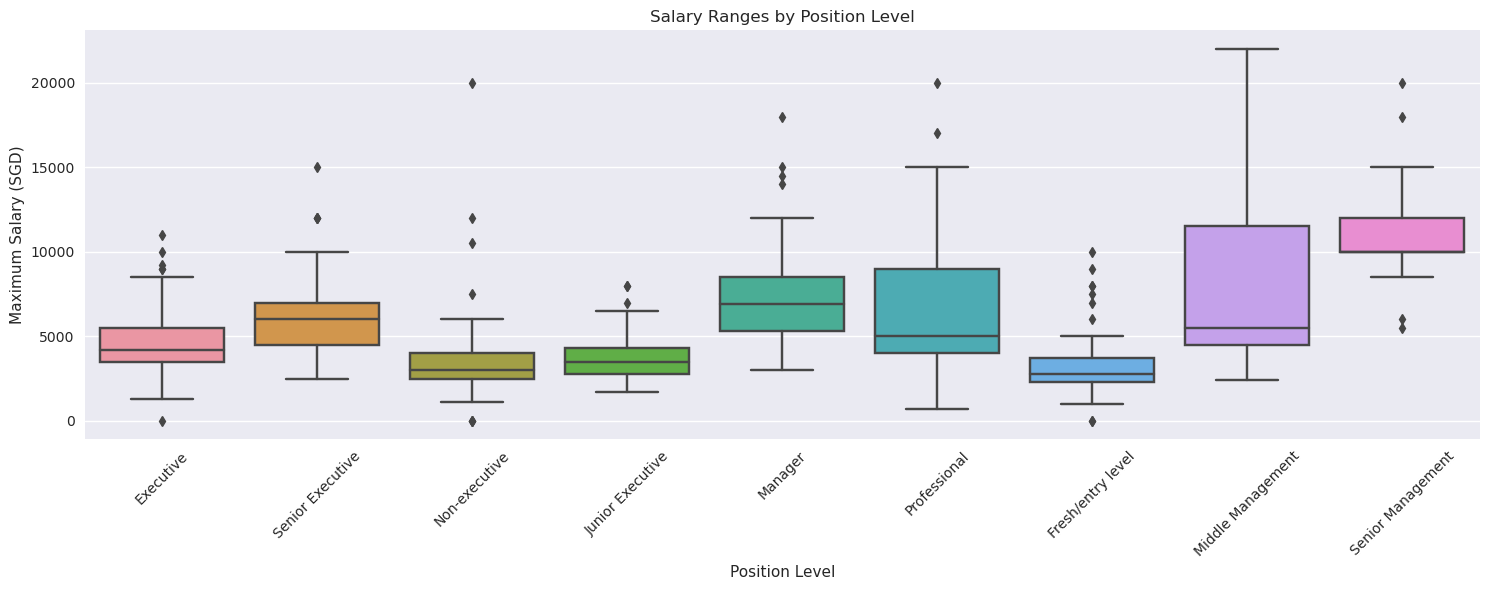

In [18]:
# Set the style for all visualizations
#plt.style.use('seaborn')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


# Create a figure for salary distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='salary_maximum', bins=30)
plt.title('Distribution of Maximum Salaries')
plt.xlabel('Maximum Salary (SGD)')
plt.ylabel('Count')
plt.show()

# Create a box plot for salary ranges by position levels
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='positionLevels', y='salary_maximum')
plt.xticks(rotation=45)
plt.title('Salary Ranges by Position Level')
plt.xlabel('Position Level')
plt.ylabel('Maximum Salary (SGD)')
plt.tight_layout()
plt.show()

#### Display Average `Maximum` Salary for Each Job Title

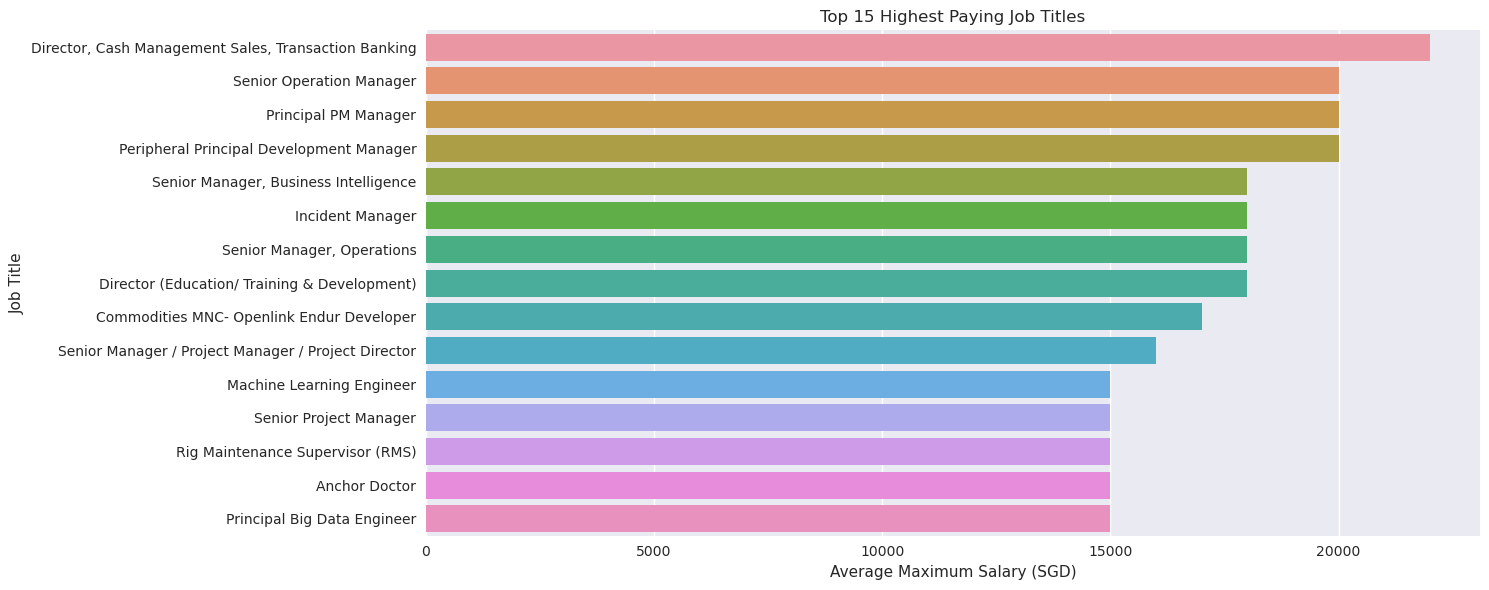

In [15]:
# Calculate average maximum salary for each job title
avg_salary_by_title = df.groupby('title')['salary_maximum'].mean().sort_values(ascending=False)

# Create a bar plot for top 15 highest paying job titles
plt.figure(figsize=(15, 6))
sns.barplot(x=avg_salary_by_title.head(15).values, 
            y=avg_salary_by_title.head(15).index)
plt.title('Top 15 Highest Paying Job Titles')
plt.xlabel('Average Maximum Salary (SGD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

#### Display Average `Minimum` Salary for Each Job Title

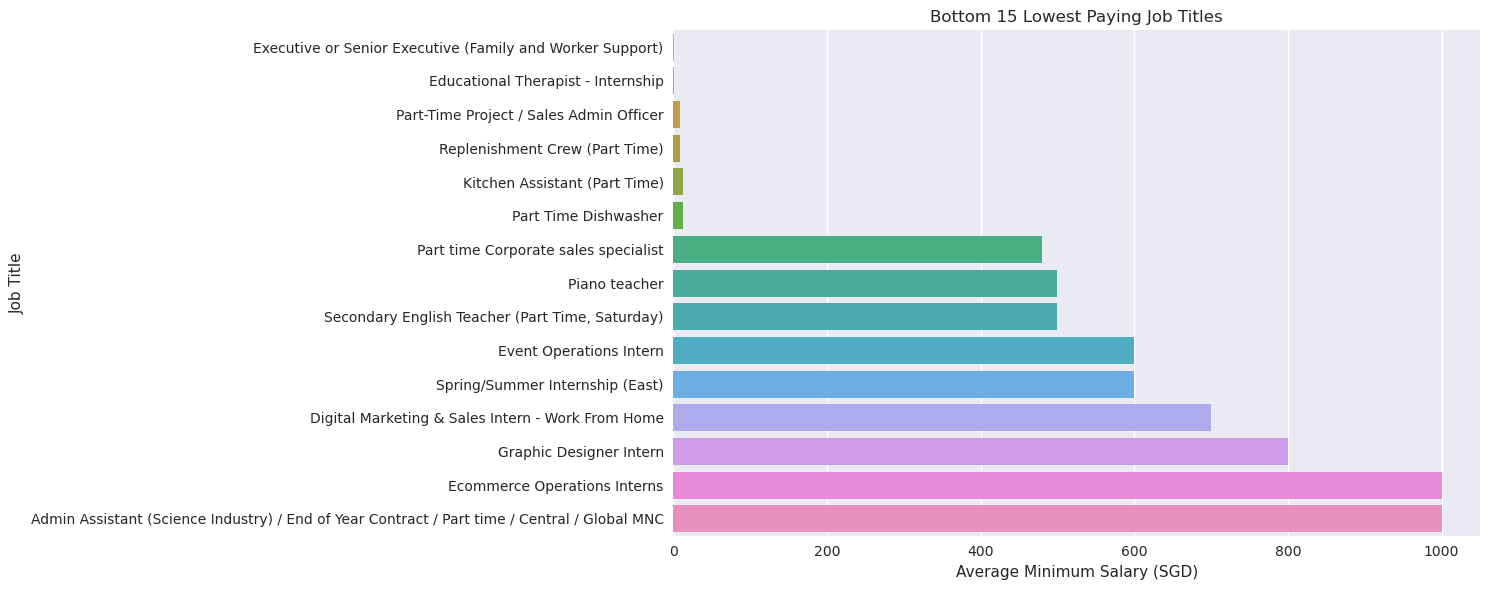

In [16]:
# Calculate average minimum salary for each job title
avg_salary_by_title = df.groupby('title')['salary_minimum'].mean().sort_values(ascending=True)

# Create a bar plot for bottom 15 lowest paying job titles
plt.figure(figsize=(15, 6))
sns.barplot(x=avg_salary_by_title.head(15).values, 
            y=avg_salary_by_title.head(15).index)
plt.title('Bottom 15 Lowest Paying Job Titles')
plt.xlabel('Average Minimum Salary (SGD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()